### Introduction

Kaggle Dataset: This dataset contains details about Honda CRV, Toyota Corolla & Ford.The jupyter notebook "Creating the dataset" is created 

 https://www.kaggle.com/zacharie/hofotocarvalues#Toyota%20Corolla_042015.csv
 
Price: Model price
Mileage :Mileage of the used car
Model Year: 1999 is 0 and so on..
Model : Car Variants


The File contains used car values from Honda (CRV), Toyota (Corolla) and Ford (Fiesta). 

Observation : This model is more accurate for lower values of mileage (< average of 35K) and Model year (less than average of 10). 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

In [240]:
# importing the dataset
car_df = pd.read_csv('data/usedcarsdataset.csv')

In [241]:
car_df.head()

,Price,Mileage,Model_Year,Model,Brand
0,15245,38069,3,New Listing,Ford
1,8995,37738,0,NaN,Ford
2,11558,25072,2,S,Ford
3,12888,12508,3,NaN,Ford
4,14998,39052,3,New Listing,Ford


In [242]:
car_df[car_df["Mileage"] > 180000]

,Price,Mileage,Model_Year,Model,Brand
278,5988,184668,7,LX,Honda CRV


In [243]:
car_df["Model_Year"].value_counts()

13    204
14    184
12    110
15     80
2      61
11     58
3      48
0      41
8      35
10     34
6      31
1      28
4      25
9      21
16     18
7      15
5       7
Name: Model_Year, dtype: int64

In [5]:
car_df["Brand"].value_counts()

Toyota Corolla    500
Honda CRV         325
Ford              175
Name: Brand, dtype: int64

In [6]:
car_df.shape

(1000, 5)

In [7]:
car_df.describe()

,Price,Mileage,Model_Year
count,1000.000000,1000.000000,1000.000000
mean,15454.799000,35784.722000,10.203000
std,4212.272463,28359.538287,4.732673
min,3749.000000,93.000000,0.000000
25%,12795.250000,16976.500000,7.000000
50%,14998.000000,28151.500000,12.000000
75%,17730.500000,46524.500000,14.000000
max,29340.000000,184668.000000,16.000000


In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
Price         1000 non-null int64
Mileage       1000 non-null int64
Model_Year    1000 non-null int64
Model         889 non-null object
Brand         1000 non-null object
dtypes: int64(3), object(2)
memory usage: 39.1+ KB


In [9]:
car_df["Brand"] = car_df["Brand"].replace("Ford", 1)
car_df["Brand"] = car_df["Brand"].replace("Honda CRV", 2)
car_df["Brand"] = car_df["Brand"].replace("Toyota Corolla", 3)

In [10]:
car_df.head(5)

,Price,Mileage,Model_Year,Model,Brand
0,15245,38069,3,New Listing,1
1,8995,37738,0,NaN,1
2,11558,25072,2,S,1
3,12888,12508,3,NaN,1
4,14998,39052,3,New Listing,1


In [11]:
car_df["Brand"].dtype

dtype('int64')

In [208]:
car_df["Model"] = car_df["Model"].replace("LE", 1)
car_df["Model"] = car_df["Model"].replace("EX", 2)
car_df["Model"] = car_df["Model"].replace("S", 3)
car_df["Model"] = car_df["Model"].replace("EX-L", 4)
car_df["Model"] = car_df["Model"].replace("LX", 5)
car_df["Model"] = car_df["Model"].replace("Sedan", 6)
car_df["Model"] = car_df["Model"].replace("L", 7)
car_df["Model"] = car_df["Model"].replace("New Listing", 8)
car_df["Model"] = car_df["Model"].replace("CE", 9)
car_df["Model"] = car_df["Model"].replace("SES", 10)
car_df["Model"] = car_df["Model"].replace("SEL",11)
car_df["Model"] = car_df["Model"].replace("ST", 12)
car_df["Model"] = car_df["Model"].replace("XLE", 13)
car_df["Model"] = car_df["Model"].replace("XRS", 14)


In [209]:
car_df["Model"].value_counts()

1.0     273
2.0     116
3.0     108
4.0     103
5.0      86
6.0      81
7.0      38
8.0      38
9.0      15
10.0     13
11.0      7
12.0      6
13.0      4
14.0      1
Name: Model, dtype: int64

In [210]:
corr_table=car_df.corr()
corr_table

,Price,Mileage,Model_Year,Model,Brand
Price,1.000000,-0.511538,0.595568,-0.083261,-0.040148
Mileage,-0.511538,1.000000,-0.297134,0.009152,0.042060
Model_Year,0.595568,-0.297134,1.000000,-0.477778,0.721428
Model,-0.083261,0.009152,-0.477778,1.000000,-0.515895
Brand,-0.040148,0.042060,0.721428,-0.515895,1.000000


### Visualization

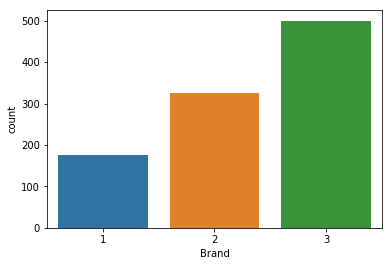

In [211]:
sns.countplot(car_df['Brand'])
plt.show()

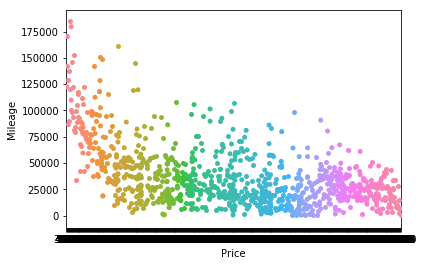

In [36]:
from matplotlib import pyplot
import seaborn as sns

sns.stripplot(x='Price', y = 'Mileage', data =car_df)

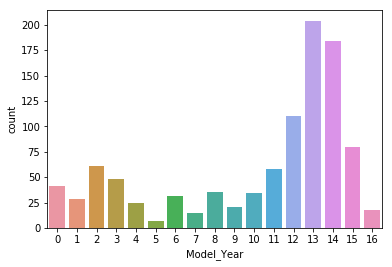

In [37]:


sns.countplot(car_df['Model_Year'])
plt.show()

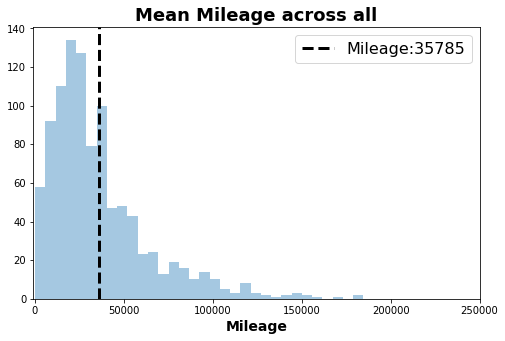

In [45]:
# look at miles overall distribution
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
sns.distplot(car_df.Mileage,kde=False)
plt.xlabel('Mileage',fontsize=14,fontweight="bold")
plt.axvline(car_df.Mileage.mean(),lw=3,ls='dashed',
            color='black',label='Mileage:'+'{0:.0f}'.format(np.mean(car_df.Mileage)))
plt.title('Mean Mileage across all',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.xlim(-1000,250000)
plt.show()

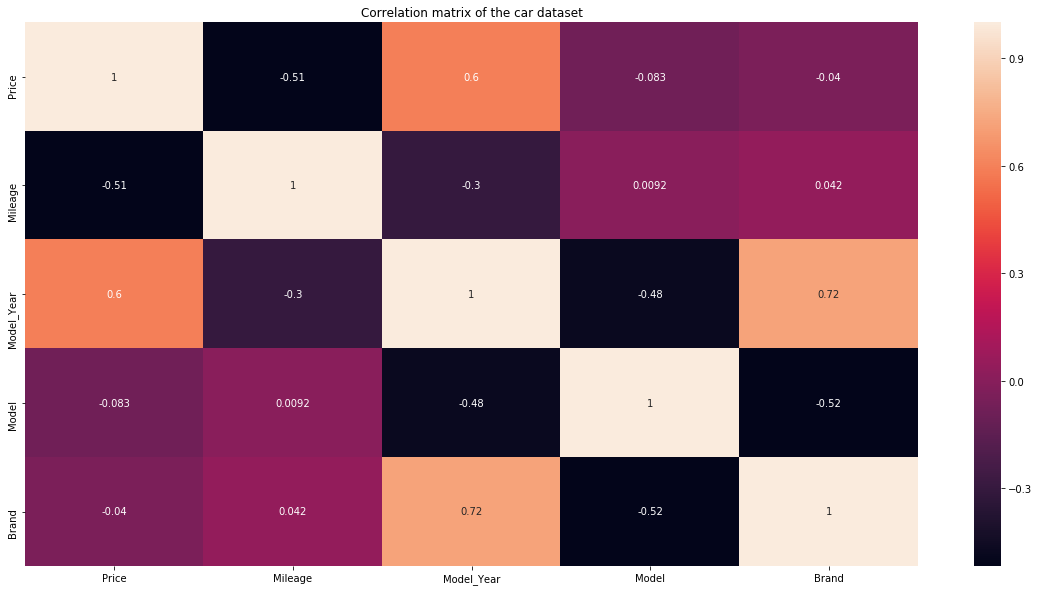

In [212]:
plt.figure(figsize=(20,10))
g=sns.heatmap(corr_table,annot=True)
g.set(title='Correlation matrix of the car dataset')
plt.show() 

/Users/nidhi/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/nidhi/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


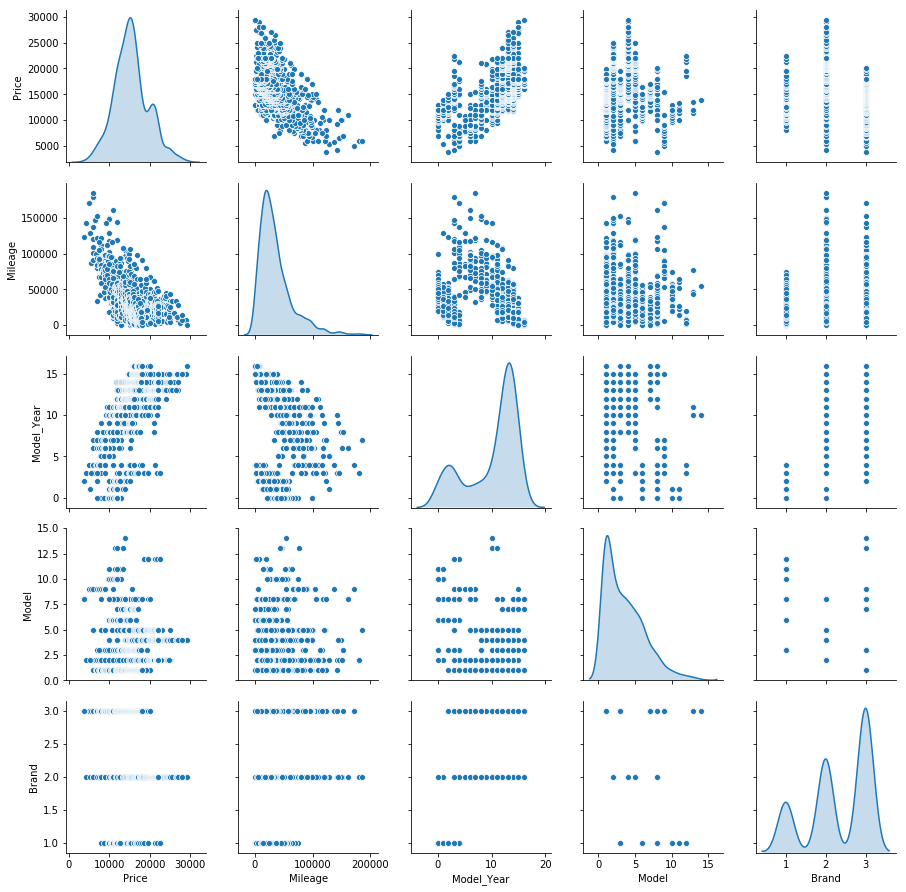

In [213]:
sns.pairplot(car_df,diag_kind='kde')
plt.show()

In [15]:
# importing the requried libaries for regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics

### Declaring X and y

In [16]:
X = car_df[["Mileage","Model_Year","Brand"]]

In [17]:
y = car_df[["Price"]]

In [18]:
y.head()

,Price
0,15245
1,8995
2,11558
3,12888
4,14998


### Linear Regression

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
y_pred = regressor.predict(X_test)
print(regressor.score(X_test,y_test))

0.8224371585661878


In [246]:
X_test

,Mileage,Model_Year,Brand
669,35528,12,3
797,17286,14,3
153,35806,1,1
761,33600,12,3
674,55087,13,3
935,6415,15,3
316,92513,11,2
700,32425,12,3
643,65980,8,3
939,19743,14,3


In [265]:
#values=[[90337,9,2]]
values=[[34247,11,3]]
# 5988	184668	7	5.0
new_mileage=regressor.predict(values)
print(new_mileage)


[[12877.63906081]]


### Dumping to Pickle

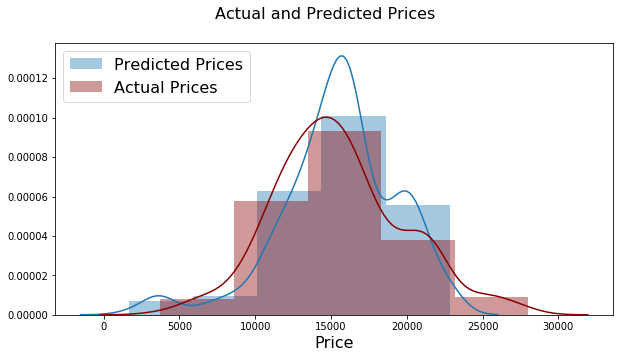

In [39]:
fig,ax = plt.subplots(figsize=(10,5),sharex=True)
fig.suptitle('Actual and Predicted Prices',fontsize=16)
# predicted
sns.distplot(y_pred, bins=5,label='Predicted Prices')

# actual
sns.distplot(y_test, bins=5,color='darkred',label='Actual Prices')
plt.xlabel('Price',fontsize=16)
plt.legend(loc='upper left',fontsize=16)

plt.show()

In [26]:
import pickle
pickle.dump(regressor, open('model.pkl','wb'))

In [27]:
model = pickle.load(open('./model.pkl','rb'))

In [28]:
new_mileage=model.predict(values)
print(new_mileage)

[[14991.59229222]]
